<a href="https://colab.research.google.com/github/achintya09/CODSOFT/blob/main/task%201/TITANIC_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#TITANIC SURVIVAL PREDICTION

## PROJECT INTRODUCTION
RMS Titanic was a British passenger liner, operated by the White Star Line, that sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time.

The Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data. The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

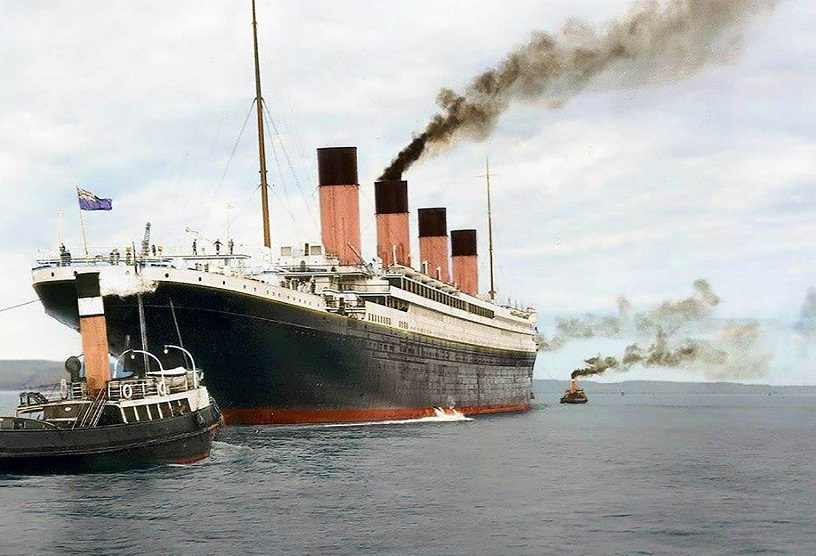

## PROBLEM STATEMENT
* To develop a model that correctly predicts whether a passenger on the Titanic survived or not.
* To develop a user friendly interface for giving instant prediction for a random input.

## ADDRESSING THE PROBLEM
* I checked various classifier model to find the best accuracy score of the model and found all are performing equally fine.
* Here I intend to use Logistic Regression to prepare the model.
* I will use for loop to create the user friendly interface.

# GETTING STARTED!

###DATA PREPROCESSING

IMPORTING THE **LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IMPORTING CSV FILE

In [ ]:
dataset = pd.read_csv('tested.csv')

In [ ]:
dataset.shape

(418, 12)

In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


###DATA CLEANING

CHECKING WHETHER THERE IS ANY MISSING VALUE

In [ ]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

HANDLING MISSING VALUES

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')
dataset['Age'] = imputer.fit_transform(dataset[['Age']])

In [ ]:
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

CHECKING IS THERE ANY DUPLICATE VALUE

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

REMOVING USELESS COLUMNS

In [ ]:
dataset = dataset.drop(['Name', 'Cabin', 'Ticket', 'PassengerId'], axis =1)

REMOVING NULL VALUES

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.shape

(417, 8)

SHIFTING THE TARGET COLUMN TO THE END

In [ ]:
dataset['Survived'] = dataset.pop('Survived')

In [ ]:
dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,34.5,0,0,7.8292,Q,0
1,3,female,47.0,1,0,7.0000,S,1
2,2,male,62.0,0,0,9.6875,Q,0
3,3,male,27.0,0,0,8.6625,S,0
4,3,female,22.0,1,1,12.2875,S,1


SPLITTING THE DATASET INTO FEATURES AND TARGET COLUMN

In [ ]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1]. values

In [ ]:
x.shape

(417, 7)

In [ ]:
print(x)

[[3 'male' 34.5 ... 0 7.8292 'Q']
 [3 'female' 47.0 ... 0 7.0 'S']
 [2 'male' 62.0 ... 0 9.6875 'Q']
 ...
 [3 'male' 38.5 ... 0 7.25 'S']
 [3 'male' 30.272590361445783 ... 0 8.05 'S']
 [3 'male' 30.272590361445783 ... 1 22.3583 'C']]


In [ ]:
y.shape

(417,)

ENCODING CATEGORICAL DATA

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('gender_encoder', OneHotEncoder(categories=[['male','female']], sparse_output=False), [1]),
        ('embarked_encoder', OneHotEncoder(categories=[['S', 'C', 'Q']], sparse_output=False), [6])],
    remainder='passthrough')
x = np.array(ct.fit_transform(x))


SPLITTING THE DATASET INTO TRAINING SET AND TEST SET

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

TRAINING MODEL ON THE TRAINING SET

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

PREDICTING RESULT

In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


CHECKING MODEL PERFORMANCE

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[69  0]
 [ 0 36]]


1.0

In [ ]:
# AS THE MODEL PERFORMS ACCURATELY, I WILL GO WITH THIS MODEL

user_input = []

messages= [
    "enter class: ",
    "enter gender(male/female): ",
    "enter Age: ",
    "enter SibSp: ",
    "enter parch: ",
    "enter fare: ",
    "enter embarked(S/C/Q): "
]

for i in messages:
  values = input(i)
  user_input.append(values)

print(" ")

result = classifier.predict(ct.fit_transform([user_input]))
print("Prediction:", result[0])
print(" ")

if result[0] == 1 :
  print("THE PERSON MAY HAVE SURVIVED ")
else:
  print("THE PERSON MAY NOT HAVE SURVIVED ")

enter class: 2
enter gender(male/female): female
enter Age: 28
enter SibSp: 0
enter parch: 0
enter fare: 10.5
enter embarked(S/C/Q): S
 
Prediction: 1
 
THE PERSON MAY HAVE SURVIVED 
